# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

Analyzed a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

## Data Exploration


In [ ]:
# Display a description of the dataset
display(data.describe())

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [2]:

indices = [45, 125, 305]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

NameError: name 'pd' is not defined

### Implementation: Feature Relevance


In [3]:
for feature in data.columns.values:
   
    new_data = data.drop([feature], axis=1)

  
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=42)

    
    regressor = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

   
    score = regressor.score(X_test, y_test)

    print("The score for feature {:16} is {:+.5f}".format(feature, score))

NameError: name 'data' is not defined

### Visualize Feature Distributions


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


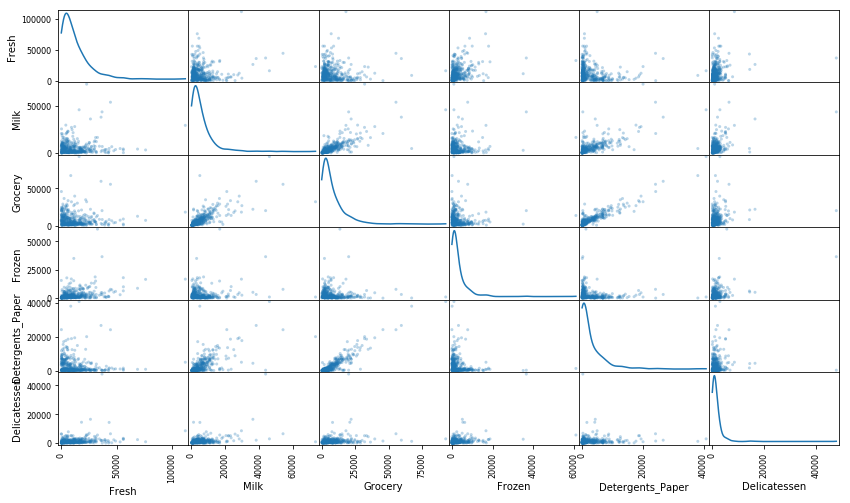

In [166]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

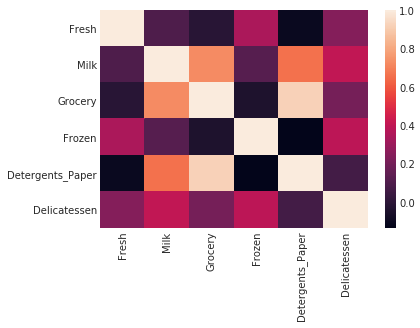

In [114]:
import seaborn as sns
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr)


There are some correlation present in our data. Seeing the scatter plot Grocery, Detergents_paper and milk seem to be fairly correlated with each other as we can see the similar pattern of distribution of data points in all the three graphs. These features were also the most predictable. I plotted the heatmap for our data; the heatmap also suggested the correlation between Grocery, Detergents_paper and milk. 

So therefore our regression model score gave the correct result Grocery is correlated with other features. The distribution of all the features does not appear to be normal. All distributions have a spike near the origin i.e at the lower values and then it goes down for a sudden drop. We can also see some outliners in the scatter plot lot of them are near the right boundary of the graph towards the higher values.



## Data Preprocessing


### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.


In [4]:

log_data =np.log(data)


log_samples = pd.DataFrame(log_data.loc[indices], columns = data.keys()).reset_index(drop = True)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

NameError: name 'np' is not defined

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appeared much more normal. For any pairs of features  identified earlier as being correlated.


In [168]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   8.552753  10.000796  9.977249  7.461640          8.902864      8.514189
1  11.241602   8.152774  8.868132  9.713416          6.656727      6.822197
2   5.493061   9.468001  9.088399  6.683361          8.271037      5.351858

### Implementation: Outlier Detection


In [5]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    
    Q1 = np.percentile(log_data[feature],25)
    
    
    Q3 = np.percentile(log_data[feature],75)
    
  
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    

outliers  = [65,66,75,128,154]


good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


NameError: name 'log_data' is not defined

## Feature Transformation


### Implementation: PCA


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(good_data.columns)).fit(good_data)


pca_samples = pca.transform(log_samples)


pca_results = vs.pca_results(good_data, pca)

NameError: name 'good_data' is not defined

The total variance in the data by first and second component is 0.4430 + 0.2638 =0.7068 i.e nearly 70%.
The first four principal components total variance is 0.7068 + 0.1231 +0.1012 = 0.9311 which is 93%.
The visualization above have  some high negative and positive values which indicates that the corresponding features contributes a lot to the value both in positive or negative way and some lowers values of certain features means that they don’t contribute much.

Dimension 1 - The component describes spending on retails goods as Groceries (~0.45) and Detergents paper(~0.8) and Milk(~0.4) these are the items of daily households and moderalty or high values. 
Dimension 2 - High value of Fresh (~0.7) and moderate values of Frozen (~0.5) and Delicatessen (~0.5) suggest that it could be restaurants serving mainly deli foods.
Dimention3 - High positive value of Delicatessen (>0.6) and high negative value of fresh (>0.6) and very moderate values of frozen(~ +0.3) and detergents paper(~ -0.2) suggest pairing of Delicatessen and frozen with highly negated fresh it could be retailers with deli food.
Dimension 4 - High positive value of frozen(~0.7) and high negative value of Delicatessen(~0.5) with moderately values of fresh(~ -0.2) and detergents paper (~+0.2) suggest pairing of frozen foods with detergents paper and strongly against delicatessen and fresh food to certain extent, it could be a small store may be on high ways or something selling frozen foods or a gas station shop may be.


### Observation


In [171]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -3.2813      -1.3308       0.9322      -0.2862       0.3269   
1       0.7394      -2.9834      -0.8204       1.2945       0.1297   
2      -2.3804       2.8989       0.9016       1.2539       0.6757   

   Dimension 6  
0      -0.1179  
1       0.4712  
2      -0.6118

### Implementation: Dimensionality Reduction


In [172]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation


In [173]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -3.2813      -1.3308
1       0.7394      -2.9834
2      -2.3804       2.8989

## Visualizing a Biplot


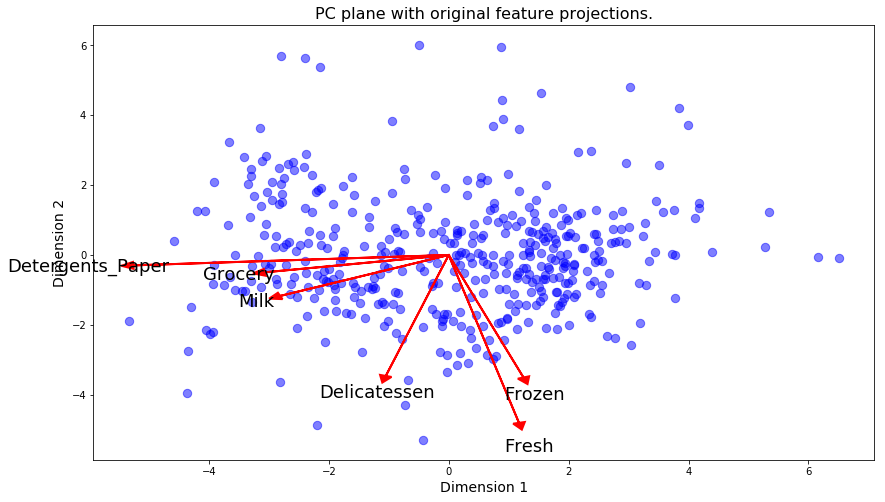

In [174]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 



## Clustering
 

**Answer:**
K-Means clustering Algorithm
K means is typically a hard clustering at it assigns some sought of boundary where the data points are either inside or outside of it.
    Advantages
        1. Ease of implementation
        2. High speed performance
        3. Measurable and efficient in large data collections
Gaussian Mixture Model Clustering Algorithm
GMM is soft clustering where each data points are given probabilities of belonging to clusters, there is no definite assignment.
    Advantages
        1. Quick to run
        2. Doesn't require a distribution to be normal for it to work
        3. There is greater flexibility due to clusters having unconstrained covariance’s.
        4. Allows Mixed memberships.(A point can belong to two clusters)
Seeing our dataset I am more likely to use GMM as our data have some mixed membership where there is no clear demarcation .Gaussian Mixture is complex and K means could also be seen as the special case of Gaussian Mixture, so as our dataset is not very large enough we could use Gaussian mixture rather than K means as a tradeoff for speed (but which would indeed not create any much difference).
 
 Source-
 https://www.slideshare.net/DarshakMehta6/k-means-clustering-algorithm-63472248
 http://scikit-learn.org/stable/modules/mixture.html


### Implementation: Creating Clusters


In [175]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans as KM
from sklearn.mixture import GaussianMixture  as GMM

minx=list({0,1})
for i in range(2,11):
    clusterer = GMM(n_components=i,random_state=20).fit(reduced_data)


    preds = clusterer.predict(reduced_data)


    centers = clusterer.means_


    sample_preds = clusterer.predict(pca_samples)


    score = silhouette_score(reduced_data,preds)

    print("The score for GMM for {}  Cluster  is {:+.5f}".format(i, score))
    minx.append(score)
x=max(minx[2:])
for i in range(2,len(minx[2:])):
    if(minx[i]==x):
        break
clusterer = GMM(n_components=i,random_state=20).fit(reduced_data) 
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds, random_state=1)
minx.append(score)
print("The score for GMM that I have chosen for {}  Cluster  is {:+.5f}".format(i, score))
minx=list()

The score for GMM for 2  Cluster  is +0.42232
The score for GMM for 3  Cluster  is +0.37553
The score for GMM for 4  Cluster  is +0.34587
The score for GMM for 5  Cluster  is +0.27309
The score for GMM for 6  Cluster  is +0.34499
The score for GMM for 7  Cluster  is +0.34241
The score for GMM for 8  Cluster  is +0.34008
The score for GMM for 9  Cluster  is +0.31712
The score for GMM for 10  Cluster  is +0.27498
The score for GMM that I have chosen for 2  Cluster  is +0.42232




* the silhouette score for several cluster numbers.
* the best silhouette score?

**Answer:**
For ease I have tried several clusters and printed out their scores to see the best results.
* GMM with 2 clusters have a score of +0.42232
* GMM with 3 clusters have a score of +0.37553
* GMM with 4 clusters have a score of +0.34587
* GMM with 5 clusters have a score of +0.27309
* GMM with 6 clusters have a score of +0.34499
* GMM with 7 clusters have a score of +0.34241
* GMM with 8 clusters have a score of +0.34008
* GMM with 9 clusters have a score of +0.31712
* GMM with 10 clusters have a score of +0.27498

Seeing all the scores the best number of cluster I found to be best suited is 2. It has the maximum silhouette score, therefore I have designated that to our actual data.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

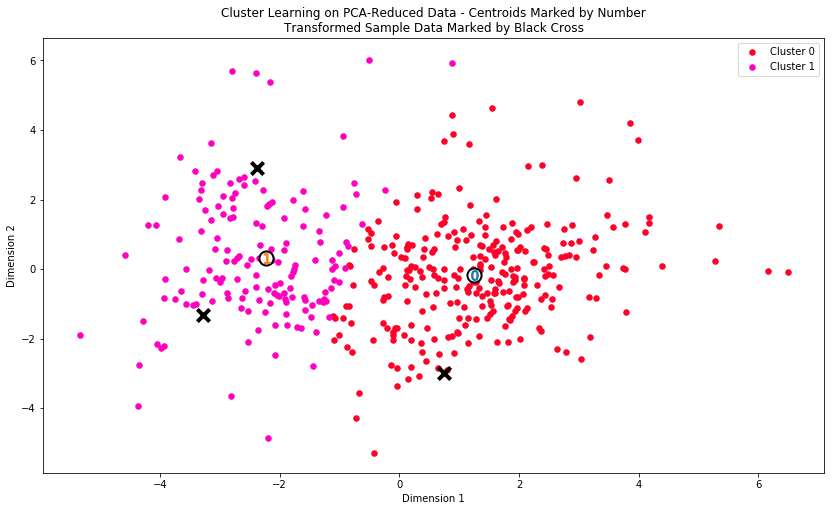

In [176]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery



In [177]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8939.0  2108.0   2758.0  2073.0             352.0         730.0
Segment 1  3567.0  7860.0  12249.0   873.0            4713.0         966.0

In [179]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [180]:
print(samples)

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   5181  22044    21531    1740              7353          4985
1  76237   3473     7102   16538               778           918
2    243  12939     8852     799              3909           211



* Sample 1 : It is predicted to be in cluster 0 and it is evident as there were more spending on milk, grocery and detergents paper.
* Sample 2 : Sample 2 is predicted to be in Cluster 1, which is also evident as there are more spending on Fresh and Frozen products.
* Sample 3 : Similarly as of sample 1 it has high spending on milk grocery and detergents paper so it is best to keep it in cluster 0.


## Conclusion

**Answer:**
We have applied machine learning to group the data into two different clusters. The first cluster has more spending on milk products, groceries and Detergents paper. These products are less liable to rot or are nonperishable though milk products are perishable but now a days with such advancements milk products can run for more than a day or two. So cluster one will have the minimal effect of change in the service while on the other hand the cluster two have more spending of fresh products and frozen products, therefore they would have the much larger impact of change in service(Fruits and vegetables are all need to be fresh there three days a week would put this value at stake).

To test the changes we could divide both the clusters into 30% of each i.e group 1 to be 30% of cluster one and group 2 be 30% of cluster 2. Then we could try our 3 days service plan on these groups and calculate the change in the total spending. The more negative the result we could make our group smaller in that respective cluster and bigger for the positive or similar results. Since positive results are expected from group 1 more than the group 2,therefore the machine learning algorithm did made it easier for the distributer to make a firm decision.
